1. [**Исследование данных**](#preprocessing)
    * [Знакомство с данными](#meet)
        * [Пропущенные значения и типы данных](#omission)
1. [**Анализ данных**](#analysis)
    * [Распределение по годам](#distribution)
    * [Общее количество продаж](#num_sales)
    * [Оценки пользователей и критиков](#scores)
1. [**Портрет пользователя**](#portrait)
    * [Интернет-покупатели](#online)
    * [Покупатели сети розничных магазинов](#offline)
1. [**Гипотезы**](#hypothesis)
1. [**Выводы**](#summary)

<a id="preprocessing"></a>
# **Исследование данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

In [2]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# если колонок окажется слишком много, пусть отображаются все
pd.set_option('display.max_columns', None)

<a id="meet"></a>
## Знакомство с данными

In [3]:
games = pd.read_csv('../datasets/games_data.csv')
rating = pd.read_csv('../datasets/rating.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 9 columns):
platform        4026 non-null object
sales_year      4026 non-null float64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1812 non-null float64
user_score      2382 non-null object
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 283.2+ KB


In [5]:
games.describe()

,sales_year,online,offline,critic_score,game_id
count,4026.000000,4026.000000,4026.000000,1812.000000,4026.000000
mean,2016.881023,20.616741,16.636612,71.274283,30186.204421
std,1.009767,57.018601,48.265285,13.095847,11533.933695
min,2015.000000,0.000000,0.000000,13.000000,10011.000000
25%,2016.000000,0.000000,0.000000,64.000000,20125.500000
50%,2017.000000,4.000000,3.000000,74.000000,30302.500000
75%,2018.000000,17.000000,13.000000,81.000000,40211.250000
max,2018.000000,966.000000,909.000000,97.000000,49998.000000


In [6]:
games.head(3)

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
0,PS3,2017.0,Action,702.0,909.0,97.0,8.2,M,20838
1,X360,2017.0,Action,966.0,514.0,97.0,8.1,M,48673
2,X360,2017.0,Shooter,904.0,424.0,88.0,3.4,M,17801


In [7]:
games.sample(3)

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
2095,PSP,2017.0,Simulation,0.0,0.0,NaN,NaN,NaN,22570
128,PS3,2017.0,Fighting,198.0,53.0,84.0,8.4,M,18823
1651,PS4,2018.0,Misc,0.0,16.0,47.0,4.1,NaN,26013


In [8]:
games.tail(3)

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
4023,PS3,2016.0,Action,0.0,0.0,NaN,NaN,NaN,47008
4024,PSV,2016.0,Adventure,0.0,0.0,NaN,NaN,NaN,18776
4025,PSV,2016.0,Simulation,0.0,0.0,NaN,NaN,NaN,16606


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


In [10]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


**Общее количество продаж**

In [11]:
games['sales'] = np.round(games.loc[:, ['online', 'offline']].sum(axis = 1), 2)
games.head(3)

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales
0,PS3,2017.0,Action,702.0,909.0,97.0,8.2,M,20838,1611.0
1,X360,2017.0,Action,966.0,514.0,97.0,8.1,M,48673,1480.0
2,X360,2017.0,Shooter,904.0,424.0,88.0,3.4,M,17801,1328.0


Похоже количество продаж тоже считается целыми цислами.

In [12]:
games['online'] = games['online'].astype(int)
games['offline'] = games['offline'].astype(int)
games['sales'] = games['sales'].astype(int)

<a id="omission"></a>
### Пропущенные значения и типы данных

In [13]:
def isnull_percent(data, text):
    print ('Доля пропущенных значений '+text+':')
    return (data.isnull().sum() / data.shape[0]).apply('{:.2%}'.format)

In [14]:
isnull_percent(games, 'games')

Доля пропущенных значений games:


platform         0.00%
sales_year       0.00%
genre            0.00%
online           0.00%
offline          0.00%
critic_score    54.99%
user_score      40.83%
rating          42.50%
game_id          0.00%
sales            0.00%
dtype: object

Оценок и рейтинга не хватает в достаточно большом объёме. Стоило бы обратиться к менеджеру за уточнением, как так вышло. Заполнить эти пропуски без дополнительной информации не представляю возможным.  
Думаю, стоило бы посадить какого-нибудь человечка, который по game_id определит, о каких именно играх идёт речь, искать оценки и рейтинги.

In [15]:
games['user_score'].unique()

array(['8.2', '8.1', '3.4', nan, '5.3', '4.8', '3.2', '8.3', '8.4', '2.6',
       '7.8', '7.2', '7', '8.7', '4.3', '6.6', '5.7', '5', '7.4', '7.5',
       '6.5', '9.1', '7.3', '6.9', '6.4', '6.1', '8.6', '7.9', '6.7',
       '5.4', '4', '8.5', '9', '4.9', '4.5', '6.2', '4.2', '6.3', '7.7',
       '9.2', '7.6', '8', '3.7', '4.1', '5.8', '5.6', '6.8', '5.5', '4.4',
       '5.9', '8.9', '3.9', 'tbd', '3.1', '2.9', '6', '4.7', '7.1', '8.8',
       '5.1', '3.5', '2.5', '3', '2.7', '2.2', '5.2', '1.8', '3.8', '3.3',
       '4.6', '9.3', '1.6', '3.6', '2.4', '2.8', '1.7', '2.1', '2', '1.5',
       '0.7', '0.2', '1.2', '0.9', '1.9', '1.3', '1', '1.4', '2.3'],
      dtype=object)

В колонке *'user_score' (оценка пользователей)* встречается значение "tbd", которое скорее всего означает "to be defined", что переводится как "подлежит определению", то есть не определена.  
Возможно, для этих игр оценка пользователей ещё будет определена, то есть работа с данными ещё не закончена, но на данный момент можно считать, что оценка неизвестна.

In [16]:
games['user_score'] = (
    games['user_score']
    .where(games['user_score'] != 'tbd', np.nan)
)

In [17]:
games['critic_score'].unique()

array([97., 88., nan, 83., 85., 90., 73., 74., 78., 87., 71., 96., 82.,
       84., 92., 86., 91., 95., 76., 93., 81., 94., 77., 80., 70., 72.,
       79., 75., 89., 66., 64., 67., 57., 68., 65., 55., 63., 54., 61.,
       33., 59., 60., 69., 52., 53., 62., 56., 39., 49., 48., 51., 43.,
       50., 32., 58., 47., 34., 46., 44., 31., 45., 41., 40., 42., 36.,
       23., 38., 35., 26., 24., 37., 21., 19., 20., 25., 13.])

In [18]:
games['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

В других стобцах таких необычных значений нет.

Год продажи - целое число.  
Количество продаж и оценки могут быть вещественными.

In [19]:
games['sales_year'] = games['sales_year'].astype(int)
games['user_score'] = games['user_score'].astype(float)

In [20]:
isnull_percent(games, 'games')

Доля пропущенных значений games:


platform         0.00%
sales_year       0.00%
genre            0.00%
online           0.00%
offline          0.00%
critic_score    54.99%
user_score      49.53%
rating          42.50%
game_id          0.00%
sales            0.00%
dtype: object

Посмотрим, связаны ли пропуски друг с другом.

In [21]:
print ('Доля игр с отсутствующей оценкой критиков среди игр с отсутствующей оценкой пользователей: {:.2%}'
       .format(games.query('user_score.isna()', engine = 'python')
               .query('critic_score.isna()', engine = 'python').shape[0] /
               games.query('user_score.isna()', engine = 'python').shape[0]))

Доля игр с отсутствующей оценкой критиков среди игр с отсутствующей оценкой пользователей: 97.54%


In [22]:
games.query('user_score.isna()',
            engine = 'python').query('critic_score.notna()', engine = 'python')['critic_score'].describe()

count    49.000000
mean     59.163265
std       9.296834
min      38.000000
25%      52.000000
50%      59.000000
75%      66.000000
max      78.000000
Name: critic_score, dtype: float64

In [23]:
print ('Доля игр с отсутствующей оценкой пользователей среди игр с отсутствующей оценкой критиков: {:.2%}'
       .format(games.query('critic_score.isna()', engine = 'python')
               .query('user_score.isna()', engine = 'python').shape[0] /
               games.query('critic_score.isna()', engine = 'python').shape[0]))

Доля игр с отсутствующей оценкой пользователей среди игр с отсутствующей оценкой критиков: 87.85%


In [24]:
games.query('critic_score.isna()',
            engine = 'python').query('user_score.notna()', engine = 'python')['user_score'].describe()

count    269.000000
mean       5.960967
std        1.891103
min        0.200000
25%        4.600000
50%        6.400000
75%        7.400000
max        8.900000
Name: user_score, dtype: float64

In [25]:
print ('Корреляция оценок пользователей и критиков по играм с обеими оценками: {:.2%}'
       .format(games.query('critic_score.notna()', engine = 'python')
               .query('user_score.notna()', engine = 'python')['user_score']
               .corr(games.query('user_score.notna()', engine = 'python')
                     .query('critic_score.notna()', engine = 'python')['critic_score'])))

Корреляция оценок пользователей и критиков по играм с обеими оценками: 53.49%


Корреляция между оценками пользователей и критиков есть, то есть, если есть оценка критиков или оценка пользователей, вторую оценку можно заполнить средним значением для игр с той же оценкой.

In [26]:
# создаёт два словаря соответствия оценки пользователей и оценки критиков
def nan_score(critic_to_user, user_to_critic):
    # оценки критиков для игр с отсутствующей оценкой пользователей
    critic = (
        games.query('user_score.isna()', engine = 'python')
        .query('critic_score.notna()', engine = 'python')['critic_score'].unique()
    )
    # оценки пользователей с отсутствующей оценкой критиков
    user = (
        games.query('critic_score.isna()', engine = 'python')
        .query('user_score.notna()', engine = 'python')['user_score'].unique()
    )
    
    flag = 0
    # для каждой пользовательской оценки ставим в соответствие среднюю оценку критиков
    for row in user:
        user_to_critic[row] = np.round(games.query('user_score.notna()', engine = 'python')
                                       .query('user_score == @row', engine = 'python')['critic_score'].mean(), 1)
        if not math.isnan(user_to_critic[row]) or user_to_critic == {}:
            flag = 1
    # для каждой оценки критиков ставим в соответствие среднюю оценку пользователей
    for row in critic:
        critic_to_user[row] = np.round(games.query('critic_score.notna()', engine = 'python')
                                       .query('critic_score == @row', engine = 'python')['user_score'].mean(), 1)
        if math.isnan(critic_to_user[row]) or user_to_critic == {}:
            flag = 1
    return flag

In [27]:
critic_to_user = {}
user_to_critic = {}
flag = nan_score(critic_to_user, user_to_critic)
while flag == 1:
    # заполняем оценки критиков
    games.loc[games['critic_score'].isna(), 'critic_score'] = games['user_score'].map(user_to_critic)
    games.loc[games['user_score'].isna(), 'user_score'] = games['critic_score'].map(critic_to_user)
    critic_to_user = {}
    user_to_critic = {}
    flag = nan_score(critic_to_user, user_to_critic)

print ('Доля игр с отсутствующей оценкой критиков среди игр с отсутствующей оценкой пользователей: {:.2%}'
       .format(games.query('user_score.isna()', engine = 'python')
               .query('critic_score.isna()', engine = 'python').shape[0] /
               games.query('user_score.isna()', engine = 'python').shape[0]))
print ('Доля игр с отсутствующей оценкой пользователей среди игр с отсутствующей оценкой критиков: {:.2%}'
       .format(games.query('critic_score.isna()', engine = 'python')
               .query('user_score.isna()', engine = 'python').shape[0] /
               games.query('critic_score.isna()', engine = 'python').shape[0]))

isnull_percent(games, 'games')

Доля игр с отсутствующей оценкой критиков среди игр с отсутствующей оценкой пользователей: 100.00%
Доля игр с отсутствующей оценкой пользователей среди игр с отсутствующей оценкой критиков: 99.49%
Доля пропущенных значений games:


platform         0.00%
sales_year       0.00%
genre            0.00%
online           0.00%
offline          0.00%
critic_score    48.56%
user_score      48.31%
rating          42.50%
game_id          0.00%
sales            0.00%
dtype: object

In [28]:
print (user_to_critic)
print (critic_to_user)

{1.6: nan, 2.8: nan, 0.7: nan, 0.2: nan, 0.9: nan}
{}


Остались только те значения, для которых оценки неизвестны.  
И доля пропусков всё равно слишком большая.

In [29]:
data = (
    games.query('critic_score.notna() and user_score.notna() and rating.notna()', engine = 'python')
    .loc[:, ['sales_year', 'online', 'offline', 'critic_score', 'user_score', 'sales']]
)
data.corr().style.background_gradient()

,sales_year,online,offline,critic_score,user_score,sales
sales_year,1,0.0722646,0.0506022,-0.0336322,0.00848664,0.0665983
online,0.0722646,1,0.751056,0.293424,0.0160535,0.946339
offline,0.0506022,0.751056,1,0.29374,0.00461696,0.924126
critic_score,-0.0336322,0.293424,0.29374,1,0.561806,0.313598
user_score,0.00848664,0.0160535,0.00461696,0.561806,1,0.0115596
sales,0.0665983,0.946339,0.924126,0.313598,0.0115596,1


Больше достаточной корреляции нигде не наблюдается.  
Посмотрим, как оценка критиков зависит от остальных параметров.

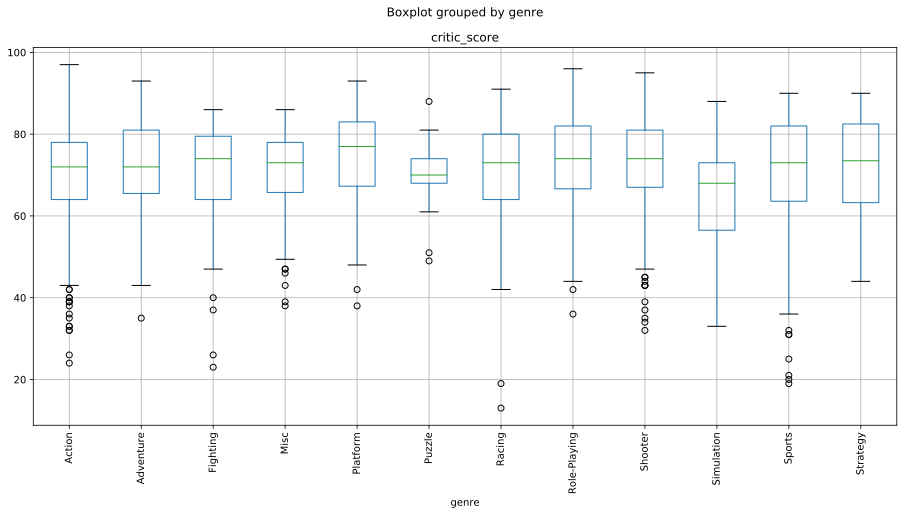

In [30]:
bp = games.boxplot(column = 'critic_score', by = 'genre',
                   figsize = (15, 7), rot = 90)
    
plt.show()

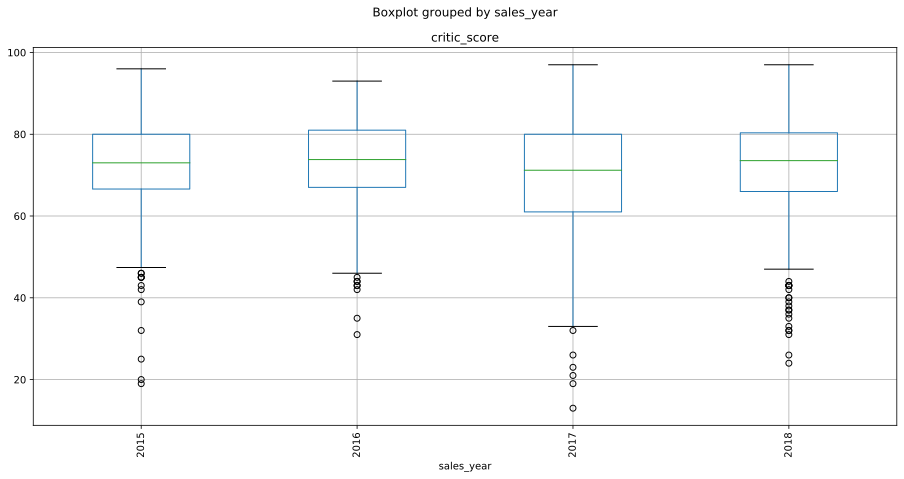

In [31]:
bp = games.boxplot(column = 'critic_score', by = 'sales_year',
                   figsize = (15, 7), rot = 90)
    
plt.show()

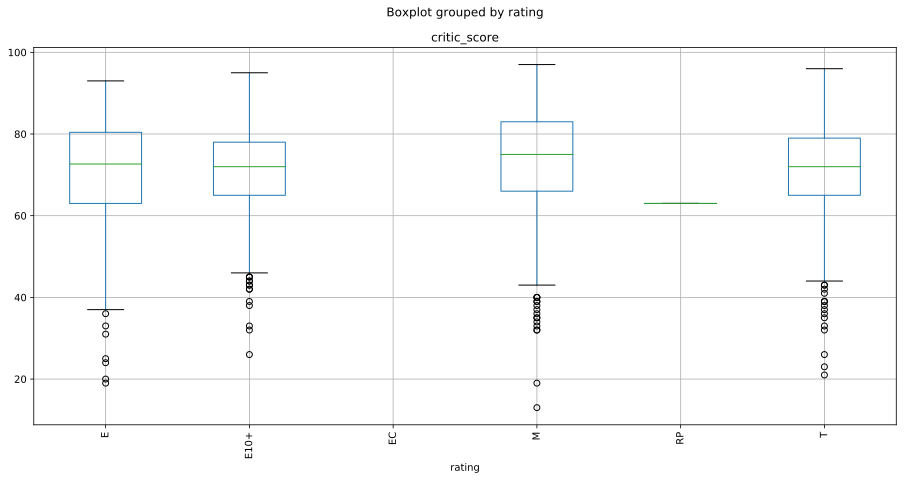

In [32]:
bp = games.boxplot(column = 'critic_score', by = 'rating',
                   figsize = (15, 7), rot = 90)
    
plt.show()

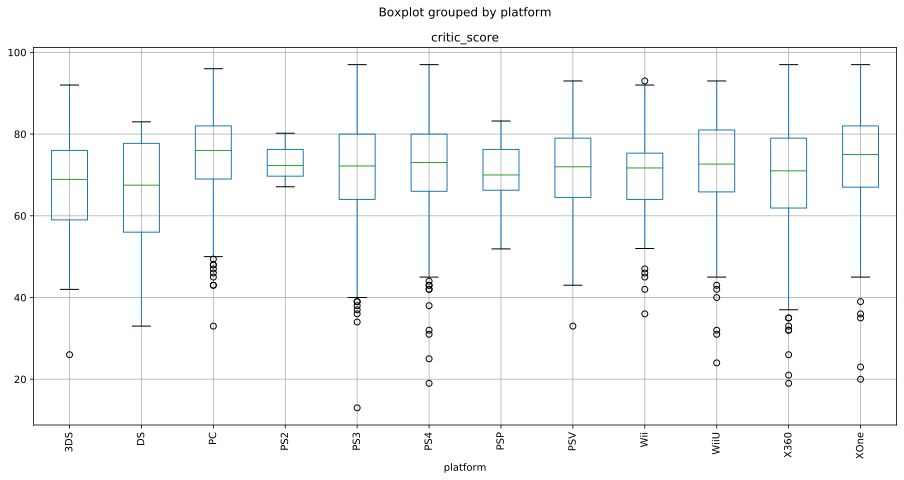

In [33]:
bp = games.boxplot(column = 'critic_score', by = 'platform',
                   figsize = (15, 7), rot = 90)
    
plt.show()

Средняя оценка критиков для разных категорий примерно одинакова, то есть чётких зависимостей нет.  
Посмотрим как оценка критиков зависит от сочетаний других параметров.

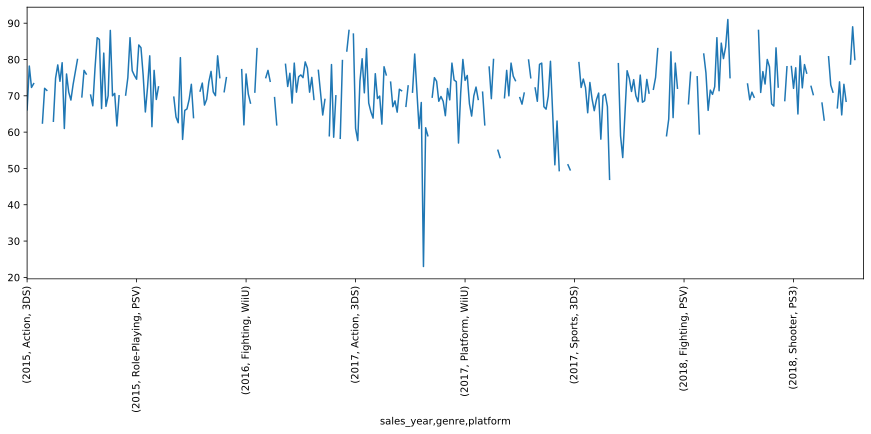

In [34]:
games.groupby(['sales_year', 'genre', 'platform'])['critic_score'].mean().plot(figsize = (15, 5), rot = 90)
plt.show()

Для каждого сочетания платформа, год выпуска, жанр средняя оценка критиков различается. Можно было бы предположить зависимость оценки от сочетания параметров, но данных в каждой такой группе очень мало, поэтому скорее всего замена пропусков на среднее в группе сильно исказит исходные данные.

In [35]:
games.duplicated().sum()

0

<a id="analysis"></a>
# **Анализ данных**

<a id="distribution"></a>
## Распределение по годам

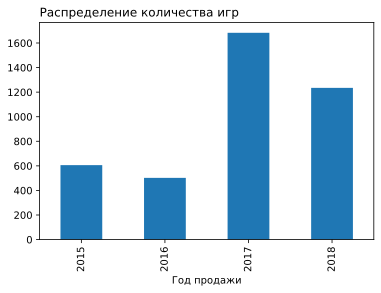

In [36]:
games.groupby('sales_year')['game_id'].count().plot(kind = 'bar')
plt.title('Распределение количества игр', loc = 'left')
plt.xlabel('Год продажи')
plt.savefig('images/years.png')
plt.show()

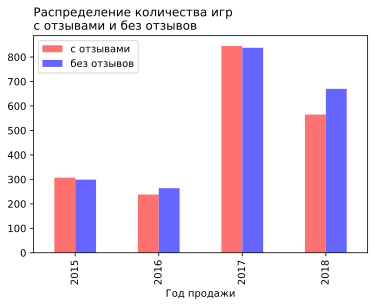

In [37]:
games['onscore'] = (
    games['critic_score']
    .where(games['critic_score'].isna() | games['user_score'].isna(), 1)
)
games['onscore'] = games['onscore'].fillna(0)
games['onscore'] = (
    games['onscore']
    .where(games['onscore'] == 0, 1)
)
games['onscore'] = games['onscore'].astype(int)

games.groupby(['sales_year', 'onscore'])['game_id'].count().unstack().plot(
    kind = 'bar', color = ['#FE7171', '#6666FF'])

plt.title('Распределение количества игр\nс отзывами и без отзывов', loc = 'left')
plt.xlabel('Год продажи')
plt.legend(['с отзывами', 'без отзывов'], loc = 2)
plt.savefig('images/comment.png')
del games['onscore']
plt.show()

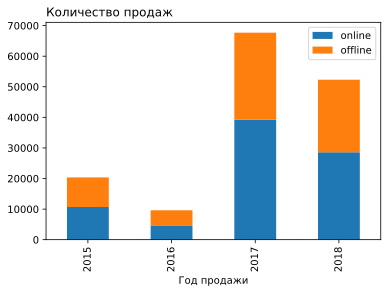

In [38]:
games.groupby('sales_year')['online', 'offline'].sum().plot(kind = 'bar', stacked = True)
plt.title('Количество продаж', loc = 'left')
plt.xlabel('Год продажи')
plt.savefig('images/sales.png')
plt.show()

<a id="num_sales"></a>
## Общее количество продаж

In [39]:
games['sales'].describe()

count    4026.000000
mean       37.253353
std        99.359061
min         0.000000
25%         0.000000
50%         8.000000
75%        31.000000
max      1611.000000
Name: sales, dtype: float64

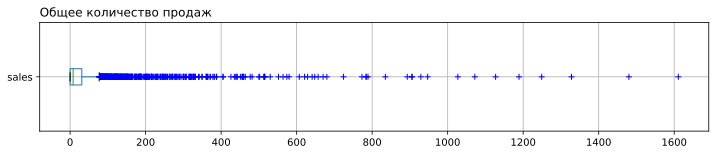

In [40]:
flierprops = dict(marker = '+', markeredgecolor = 'b')
medianprops = dict(linestyle = '-', linewidth = 1)

games.boxplot(column = 'sales', medianprops = medianprops, flierprops = flierprops, vert = False, figsize = (12, 2))
plt.title('Общее количество продаж', loc = 'left')
plt.show()

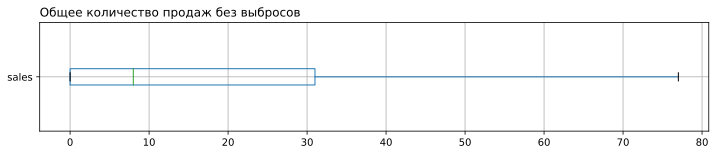

In [41]:
games.boxplot(column = 'sales', medianprops = medianprops, flierprops = flierprops, vert = False,
              figsize = (12, 2), sym = '')
plt.title('Общее количество продаж без выбросов', loc = 'left')
plt.show()

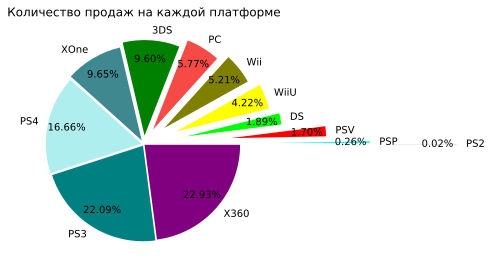

In [42]:
platform = games.groupby(['platform'])['sales'].sum().sort_values()
#print (platform)

explodeTuple = (2.5, 1.5, 1, .5, .4, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.01)
colors  = ('#000000', '#00FFFF', '#FF0000', '#00FF00', '#FFFF00', '#808000',
           '#F64A46', '#008000', '#3F888F', '#AFEEEE', '#008080', '#800080')

platform.plot(y = 'platform', kind = 'pie', autopct = '%.2f%%', pctdistance = 0.8, radius = 1.1,
              explode = explodeTuple, colors = colors)

plt.title('Количество продаж на каждой платформе\n')
plt.ylabel('')
plt.savefig('images/platform.png')
plt.show()

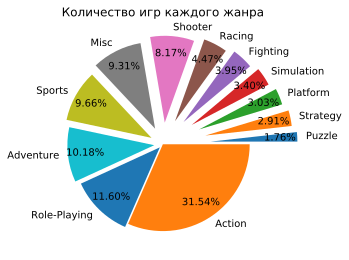

In [43]:
genre = games.groupby(['genre']).size().sort_values()
#print (platform)

explodeTuple = (0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0)

genre.plot(y = 'genre', kind = 'pie', autopct = '%.2f%%', pctdistance = 0.8,
           explode = explodeTuple)

plt.title('Количество игр каждого жанра\n')
plt.ylabel('')
plt.savefig('images/genre.png')
plt.show()

<a id="scores"></a>
## Оценки пользователей и критиков

In [44]:
print ('Игры с наибольшей пользовательской оценкой:')
games[games['user_score'] == games['user_score'].max()]

Игры с наибольшей пользовательской оценкой:


,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales
639,PC,2015,Role-Playing,21,46,93.0,9.3,M,12365,67
2348,PSV,2015,Adventure,0,3,86.0,9.3,M,38270,3


In [45]:
print ('Игры с наименьшей пользовательской оценкой:')
games[games['user_score'] == games['user_score'].min()]

Игры с наименьшей пользовательской оценкой:


,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales
2118,PS3,2016,Sports,7,2,NaN,0.2,E,23493,9


In [46]:
print ('Игры с наибольшей оценкой критиков:')
games[games['critic_score'] == games['critic_score'].max()]

Игры с наибольшей оценкой критиков:


,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales
0,PS3,2017,Action,702,909,97.0,8.2,M,20838,1611
1,X360,2017,Action,966,514,97.0,8.1,M,48673,1480
9,PS4,2018,Action,396,631,97.0,8.3,M,28618,1027
44,XOne,2018,Action,281,219,97.0,7.9,M,39055,500


In [47]:
print ('Игры с наименьшей оценкой критиков:')
games[games['critic_score'] == games['critic_score'].min()]

Игры с наименьшей оценкой критиков:


,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales
3026,PS3,2017,Racing,2,1,13.0,1.0,M,28618,3


In [48]:
print ('Корреляция оценок пользователей и критиков: {:.2%}'.format(games['user_score'].corr(games['critic_score'])))

Корреляция оценок пользователей и критиков: 55.72%


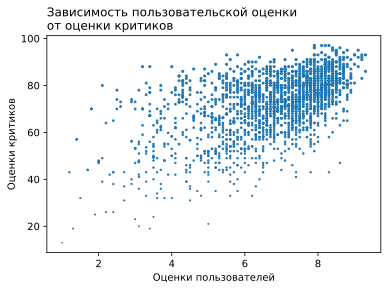

In [49]:
games.plot(x = 'user_score', y = 'critic_score', kind = 'scatter', s = games['critic_score'] * 0.05)
plt.title('Зависимость пользовательской оценки\nот оценки критиков', loc = 'left')
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки критиков')
plt.savefig('images/corr.png')
plt.show()

In [50]:
cols = games['genre'].unique()

flierprops = dict(marker = '+', markeredgecolor = 'b')
meanpointprops = dict(marker = '+', markeredgecolor = 'r', markerfacecolor = 'r')
medianprops = dict(linestyle = '-', linewidth = 1)

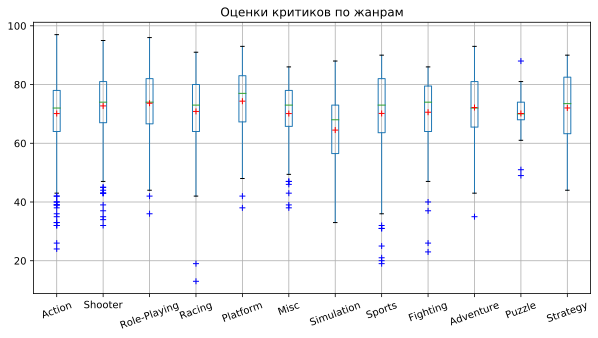

In [51]:
fig, ax = plt.subplots(figsize = (10, 5), sharey = True)

i = 0
for x in cols:
    games.query('genre == @x').boxplot(column = 'critic_score', medianprops = medianprops,
                            meanprops = meanpointprops, showmeans = True, return_type = 'dict',
                            flierprops = flierprops,
                            positions = [i], ax = ax, rot = 20)
    i += 1

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], cols)
plt.title('Оценки критиков по жанрам')
plt.savefig('images/critic_genre.png')
plt.show()

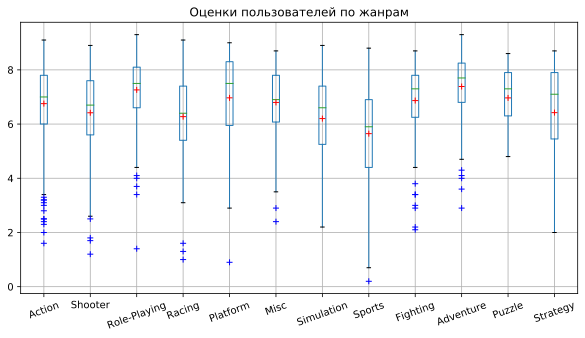

In [52]:
fig, ax = plt.subplots(figsize = (10, 5), sharey = True)

i = 0
for x in cols:
    games.query('genre == @x').boxplot(column = 'user_score', medianprops = medianprops,
                            meanprops = meanpointprops, showmeans = True, return_type = 'dict',
                            flierprops = flierprops,
                            positions = [i], ax = ax, rot = 20)
    i += 1

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], cols)
plt.title('Оценки пользователей по жанрам')
plt.savefig('images/user_genre.png')
plt.show()

<a id="portrait"></a>
# **Портрет пользователя**

In [53]:
def top_print(group, onoff, text, flag):
    data = games.groupby(group)[onoff].sum().sort_values(ascending = False)
    print (text+' покупателей '+str(onoff)+':')
    for i in range(min(data.shape[0], 5)):
        print (data.index[i], end = ' ')
        if flag == True:
            print(data.values[i])
        else:
            print ('')

<a id="online"></a>
## Интернет-покупатели

In [54]:
top_print('genre', 'online', 'Топ-5 предпочтительных жанров', 0)

Топ-5 предпочтительных жанров покупателей online:
Action 
Shooter 
Sports 
Role-Playing 
Misc 


In [55]:
top_print('sales_year', 'online', 'Активность', 1)

Активность покупателей online:
2017 39240
2018 28574
2015 10684
2016 4493


In [56]:
top_print('platform', 'online', 'Топ-5 предпочтительных платформ', 0)

Топ-5 предпочтительных платформ покупателей online:
X360 
PS3 
PS4 
XOne 
3DS 


In [57]:
data = games.groupby('rating')['online'].sum().sort_values(ascending = False)
print ('Наиболее частотная категория покупателей online:')
print (rating[rating['rating_type'] == data.index[0]]['decryption'].values[0])

Наиболее частотная категория покупателей online:
От 17 лет


<a id="offline"></a>
## Покупатели сети розничных магазинов

In [58]:
top_print('genre', 'offline', 'Топ-5 предпочтительных жанров', 0)

Топ-5 предпочтительных жанров покупателей offline:
Action 
Shooter 
Sports 
Role-Playing 
Racing 


In [59]:
top_print('sales_year', 'offline', 'Активность', 1)

Активность покупателей offline:
2017 28446
2018 23731
2015 9672
2016 5119


In [60]:
top_print('platform', 'offline', 'Топ-5 предпочтительных платформ', 0)

Топ-5 предпочтительных платформ покупателей offline:
PS3 
PS4 
X360 
3DS 
PC 


In [61]:
data = games.groupby('rating')['offline'].sum().sort_values(ascending = False)
print ('Наиболее частотная категория покупателей offline:')
print (rating[rating['rating_type'] == data.index[0]]['decryption'].values[0])

Наиболее частотная категория покупателей offline:
От 17 лет


<a id="hypothesis"></a>
# **Гипотезы**

In [62]:
def pval(one, two):
    alpha = 0.05

    results = st.ttest_ind(one, two)

    print('p-значение:', results.pvalue)
    print('вероятность: {:.2%}'.format(results.pvalue))

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

$H_0$ = "средний пользовательский рейтинг платформ PS3 и PS4 одинаковый"

In [63]:
PS3 = games.query('platform == "PS3" and user_score.notna()', engine = 'python')['user_score']
PS4 = games.query('platform == "PS4" and user_score.notna()', engine = 'python')['user_score']

pval(PS3, PS4)

p-значение: 0.20389133674405538
вероятность: 20.39%
Не получилось отвергнуть нулевую гипотезу


In [64]:
print (PS3.mean())
print (PS4.mean())

6.595754716981137
6.748076923076923


$H_0$ = "средний пользовательский рейтинг жанров Action и Sports одинаковый"

In [65]:
Action = games.query('genre == "Action" and user_score.notna()', engine = 'python')['user_score']
Sports = games.query('genre == "Sports" and user_score.notna()', engine = 'python')['user_score']

pval(Action, Sports)

p-значение: 3.1187903412596335e-24
вероятность: 0.00%
Отвергаем нулевую гипотезу


In [66]:
print (Action.mean())
print (Sports.mean())

6.754264705882367
5.645849802371542


<a id="summary"></a>
# **Выводы**

***1. В данных не хватает оценок и рейтинга в достаточно большом объёме.***  

Доля пропущенных значений:

Колонка|Доля пропусков
-|:-:
critic_score|54.99%
user_score|40.83%
rating|42.50%

Возможно, кто-то, кто собирал данные, не нашёл нужной информации по части игр.

В колонке 'user_score' (оценка пользователей) встречается значение "tbd", которое скорее всего означает "to be defined", что переводится как "подлежит определению". Это значение было принято как неизвестное.

***2. Был произведён анализ данных.***

|в ходе анализа обнаружено, что|график|
|:----|:----:|
|в 2017 году было выпущено больше всего игр, а меньше всего - в 2016|![](images/years.png)|
|<ul><li>игр с отзывами  в 2015 и 2017 годах было больше,<br>чем игр без отзывов, а в 2016 и 2018 наоборот</li><li>игр с отзывами и игр без отзывов больше всего было выпущено в 2017 году,<br>а меньше всего - в 2016</li></ul>|![](images/comment.png)|
|<ul><li>в 2017 году было больше всего продаж</li><li>в 2015-2016 годах было примерно равное количество продаж в <br>интернете и в розничных магазинах, а после 2016 года количество продаж<br>в интернете увеличилось</li></ul>|![](images/sales.png)|
|самая популярная платформа по количеству продаж X360 (22.93%)<br>а самая не популярная PS2 (0.01%)|![](images/platform.png)|
|самый популярный жанр Action (31.54%)|![](images/genre.png)|

Игры в основном имеют до 30 продаж, но есть и такие, у которых количество продаж превысило 1000

***3. Исследование оценок критиков и пользователей.***

Игр с наибольшей пользовательской оценкой (9.3) 2. Они были выпущены в 2015 году для людей от 17 лет и имеют следующие параметры:

game_id|platform|genre|critic_score
-|-|-|-
12365|PC |Role-Playing|93.0
38270|PSV|Adventure   |86.0

Игра с наименьшей пользовательской оценкой (0.2) была выпущена в 2016 году для всех:

game_id|platform|genre|critic_score
-|-|-|-
23493|PS3|Sports|не имеет оценки

Игры с наибольшей оценкой критиков (97) были выпущены в 2017-2018 годах для людей от 17 лет:

game_id|platform|year|genre|user_score
-|-|-|-|-
20838|PS3	|2017|Action	|8.2
48673|X360	|2017|Action	|8.1
28618|PS4	|2018|Action	|8.3
39055|XOne	|2018|Action	|7.9

Игра с наименьшей оценкой критиков (13) была выпущена в 2017 году для людей от 17 лет:

game_id|platform|genre|user_score
-|-|-|-
28618|PS3|Racing|1.0

Корреляция между оценками критиков и оценками пользователей 53.49%, то есть положительная, когда увеличение оценок критиков ведет к увеличению оценко пользователей.
![](images/corr.png)

![](images/critic_genre.png)
![](images/user_genre.png)

***4. Портрет пользователей.***

Интернет-покупатели и покупатели розничных магазинов больше всего предпочитают жанры *Action*, *Shooter*, *Sports*, *Role-Playing*, но в топ-5 жанров интернет-покупателей входит также *Misc*, а в топ-5 покупателей розничных магазинов - *Racing*.

Наибольшее количество покупателей и в интернете и в розничных магазинах, это люди от 17 лет.

Топ-5 предпочтительных платформ:

-|для интернет-покупателей|для покупателей розничных магазинов
-|:-:|:-:
1|X360|PS3
2|PS3| PS4
3|PS4| X360
4|XOne|3DS
5|3DS| PC

Активность покупателей:

год|количество продаж в интернете|количество продаж в розничных магазинах
:-:|:-:|:-:
2017| 39240| 28446
2018| 28574| 23731
2015| 10684| 9672
2016|  4493| 5119

***5. Гипотезы.***  
    Для обеих гипотез сравниваются независимые совокупности данных, поэтому был выбран критерий для сравнения независимых совокупностей.  
   - Было предположено, что средний пользовательский рейтинг платформ PS3 и PS4 одинаковый.  
        Опровергнуть предположение не удалось. Средний рейтинг платформ PS3 и PS4 составляет 6.61 и 6.75 соответственно.  


   - Также, было предположено, что средний пользовательский рейтинг жанров Action и Sports одинаковый.  
        Предположение не оправдалось. Средний рейтинг жанров Action и Sports 6.78 и 5.65 соответственно.